#  Data Preparation.


In [97]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression


Load the data into a Pandas DataFrame, name it as `crypto_df`.

In [98]:
crypto_df = pd.read_csv("./crypto_data.csv")
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [99]:
crypto_df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.

In [100]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object



 We can drop the `isTrading` column from the Dataframe

In [101]:
# Remove the isTrading Column
crypto_df = crypto_df.drop(columns=["IsTrading"])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


Remove all rows with `null` values if any.

In [102]:
print("Number of rows before removing nulls:", len(crypto_df))

df = crypto_df.dropna()

print("Number of rows after removing nulls:", len(df))

Number of rows before removing nulls: 1252
Number of rows after removing nulls: 744


In [103]:
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


Filter for cryptocurrencies that have been mined

In [104]:
df_mined =

SyntaxError: invalid syntax (<ipython-input-104-9e9135fc4bf3>, line 1)

In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe

In [105]:
df1 = df.drop(columns=["CoinName"])
df1.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000


Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical

In [106]:
df2 = pd.get_dummies(df1)

df2.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_808,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

# Create a DataFrame with the transformed data
df2_scaled = pd.DataFrame(scaled_data, columns=df2.columns)


# Preview DataFrame
df2_scaled.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_808,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,-0.100477,-0.036686,-0.036686,-0.036686,27.258026,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,...,-0.051917,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686
1,-0.073174,-0.036686,-0.036686,27.258026,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,...,-0.051917,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686
2,-0.100477,-0.036686,-0.036686,-0.036686,-0.036686,27.258026,-0.036686,-0.036686,-0.036686,-0.036686,...,-0.051917,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686
3,0.657142,27.258026,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,...,-0.051917,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686
4,-0.100013,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,...,-0.051917,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686,-0.036686


### Dimensionality Reduction

In [108]:
# Perform dimensionality reduction with PCA

df2_scaled = StandardScaler().fit_transform(df2)


# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the data.
df3 = pca.fit_transform(df2_scaled)

df3.shape

(744, 731)

In [116]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results

# Initialize t-SNE model
tsne = TSNE(n_components=2, perplexity=20.0)

# Apply a fit-transform
tsne_features = tsne.fit_transform(df3)
tsne_features.shape


C:\Users\choki\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\choki\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(744, 2)

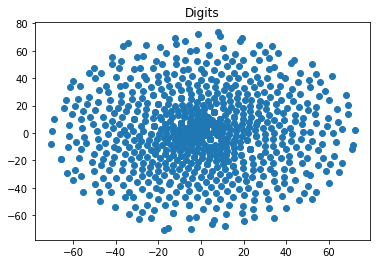

In [117]:
plt.scatter(x=tsne_features[:,0], y=tsne_features[:,1])
plt.title('Digits')
plt.show()

# Cluster Analysis with k-Means

In [118]:
model = KMeans(n_clusters=3, random_state=5)

model.fit(df3)

KMeans(n_clusters=3, random_state=5)

In [119]:
# Get predictions
predictions = model.predict(df3)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [120]:
# Check the centroids
model.cluster_centers_

array([[ 2.77644425e-04, -5.20106922e-02,  5.12577551e-02, ...,
         1.75514618e-17, -5.13843767e-17,  3.55962462e-17],
       [-3.30644292e-01,  3.87851923e+01, -3.80332543e+01, ...,
        -7.71785098e-15, -1.89395116e-15,  1.23106825e-15],
       [ 1.24632128e-01, -1.93258710e-01, -9.09439617e-14, ...,
         7.03129369e-15, -5.91859738e-16, -3.83525110e-15]])

In [121]:
# Check the inertia
model.inertia_

889735.172453729

C:\Users\choki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


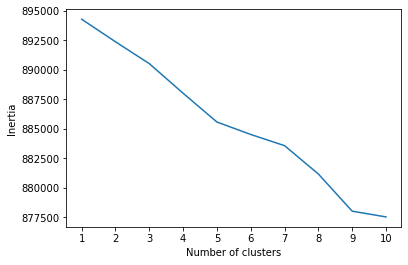

In [122]:
inertia = []
k_list = [1,2,3,4,5,6,7,8,9,10]
# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(df3)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The value of K is 9